In [3]:
import pandas as pd

In [4]:
hr_data = pd.read_csv('HR_comma_sep.csv')

In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
hr_data.shape

(14999, 10)

In [7]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
#correlation
hr_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [10]:
import seaborn as sb

<AxesSubplot:>

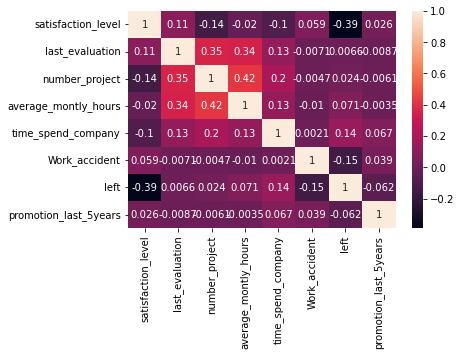

In [11]:
sb.heatmap(hr_data.corr(), annot=True)

In [12]:
#linear regression 
import statsmodels.api as sm

In [14]:
y = hr_data['average_montly_hours']
x = hr_data[['number_project']]
c = sm.add_constant(x)

In [15]:
c

,const,number_project
0,1.0,2
1,1.0,5
2,1.0,7
3,1.0,5
4,1.0,2
...,...,...
14994,1.0,2
14995,1.0,2
14996,1.0,2
14997,1.0,6


In [16]:
model = sm.OLS(y, x).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     average_montly_hours   R-squared (uncentered):                   0.911
Model:                              OLS   Adj. R-squared (uncentered):              0.911
Method:                   Least Squares   F-statistic:                          1.527e+05
Date:                  Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                          21:53:50   Log-Likelihood:                         -83173.
No. Observations:                 14999   AIC:                                  1.663e+05
Df Residuals:                     14998   BIC:                                  1.664e+05
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
number_project    49.4473      0.127    390.785      0.000      49.199      49.695
==============================================================================
Omnibus:                      212.337   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.266
Skew:                          -0.274   Prob(JB):                     7.36e-50
Kurtosis:                       3.247   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression().fit(x,y)

In [22]:
model.coef_

array([16.90485267])

In [23]:
model.intercept_

136.76027693974663

In [24]:
#y = -16.90485x + 136.76028

In [25]:
model.predict([[10]])

/Users/ada-eze/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([305.80880367])

In [32]:
import seaborn as sb

import matplotlib.pyplot as plt
plt.figure(figsize = (26,5))
plt.style.use('fivethirtyeight')

from matplotlib import rcParams

#figure size in inches
rcParams['figure.figsize']= 14.7,8.27

<Figure size 1872x360 with 0 Axes>

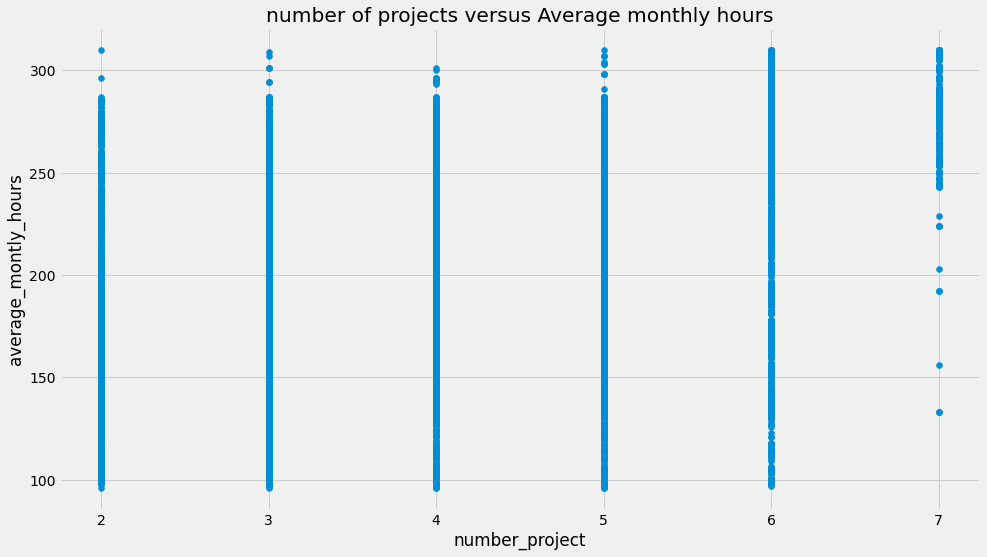

In [36]:
plt.scatter(hr_data.number_project, hr_data.average_montly_hours)
plt.title('number of projects versus Average monthly hours')
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.show()

Text(0.5, 1.0, 'Number of project by Average Monthly Hours')

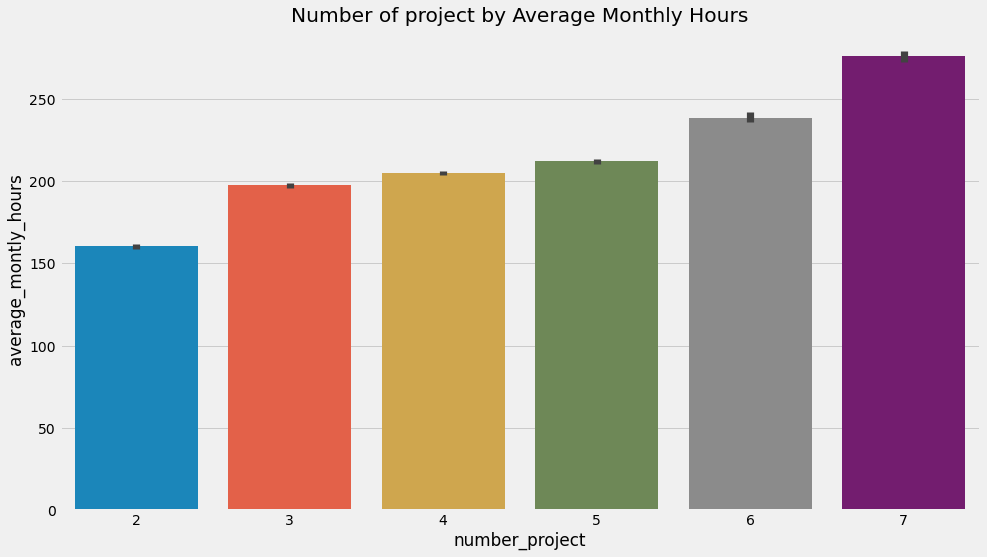

In [33]:
sb.barplot(x='number_project',y= 'average_montly_hours', data=hr_data).set_title('Number of project by Average Monthly Hours')

Text(0.5, 1.0, 'Number of project by Average Monthly Hours')

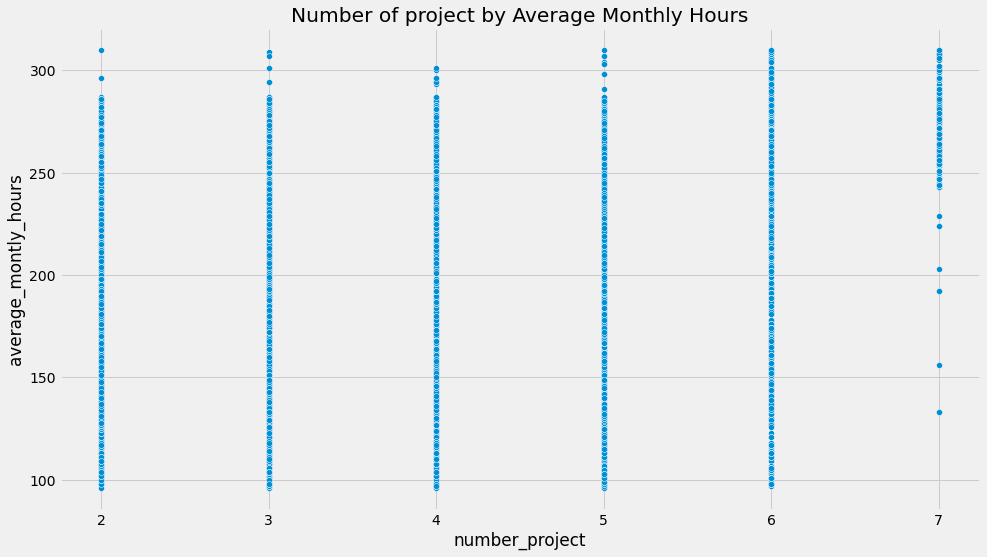

In [34]:
sb.scatterplot(x='number_project', y='average_montly_hours', data= hr_data).set_title('Number of project by Average Monthly Hours')

Text(0.5, 1.0, 'Number of project by Average Monthly Hours')

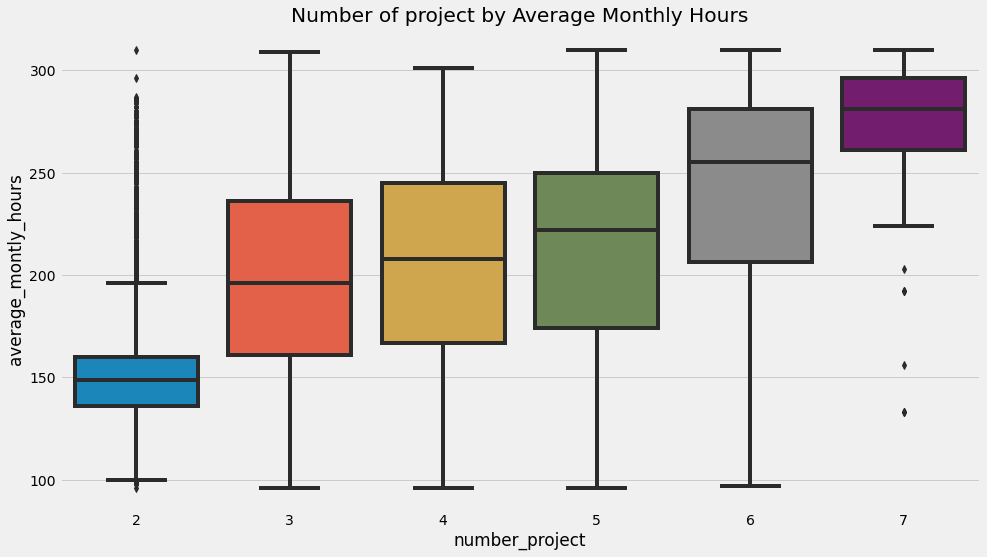

In [35]:
sb.boxplot(x='number_project', y='average_montly_hours', data= hr_data).set_title('Number of project by Average Monthly Hours')